# LOAD THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# LOAD THE DATASET

In [2]:
!unzip iris.zip

Archive:  iris.zip
  inflating: IRIS.csv                


In [3]:
df=pd.read_csv("/content/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# PERFORMING EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## CHECKING FOR NULL VALUES

In [9]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## DATA VISUALIZATION

<Axes: >

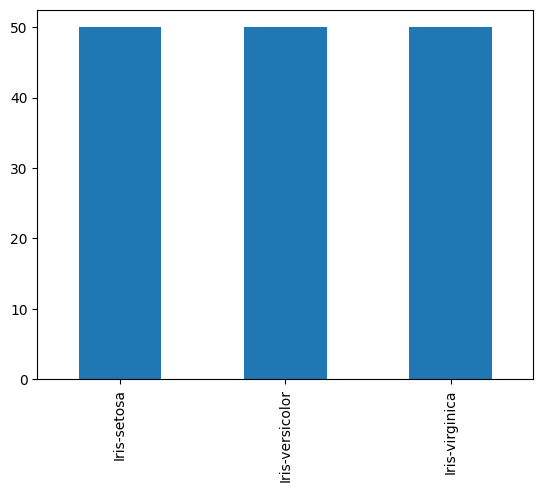

In [8]:
df["species"].value_counts().plot(kind="bar")

<ipython-input-15-91e04118b765>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sepal_width'],color='red')


<Axes: xlabel='sepal_width', ylabel='Density'>

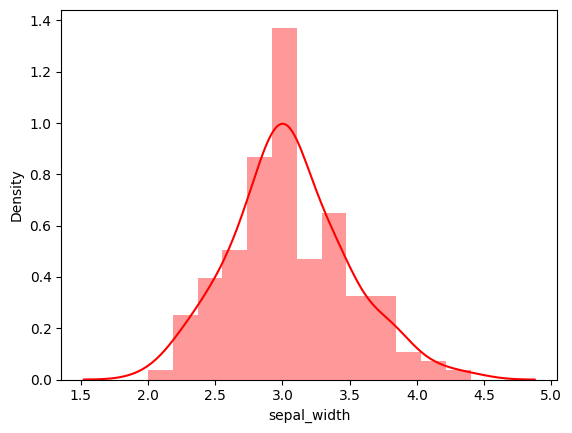

In [15]:
sns.distplot(df['sepal_width'],color='red')

<Axes: ylabel='sepal_length'>

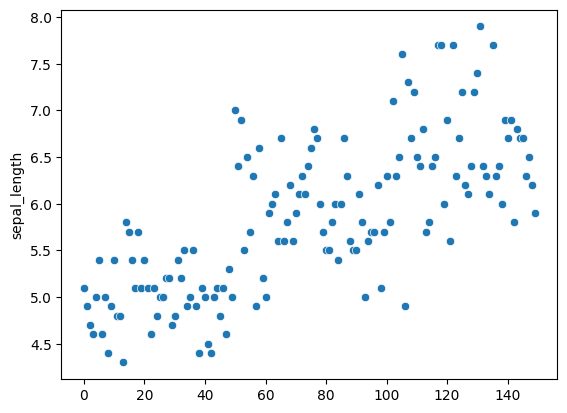

In [12]:
sns.scatterplot(df["sepal_length"])

<Axes: ylabel='petal_length'>

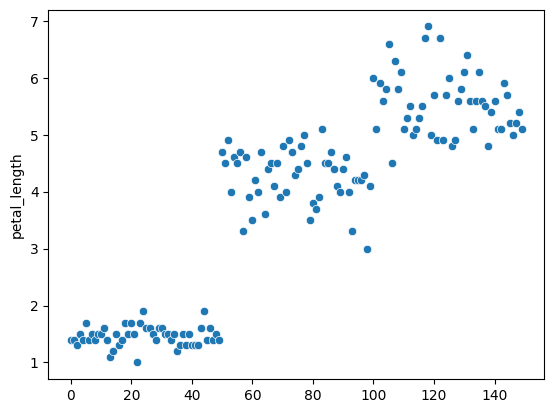

In [13]:
sns.scatterplot(df["petal_length"])

<ipython-input-14-f31214845b0e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['petal_width'],color='red')


<Axes: xlabel='petal_width', ylabel='Density'>

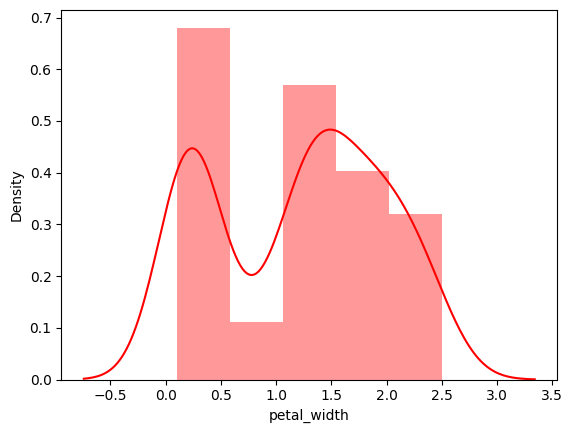

In [14]:
sns.distplot(df['petal_width'],color='red')

<ipython-input-16-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

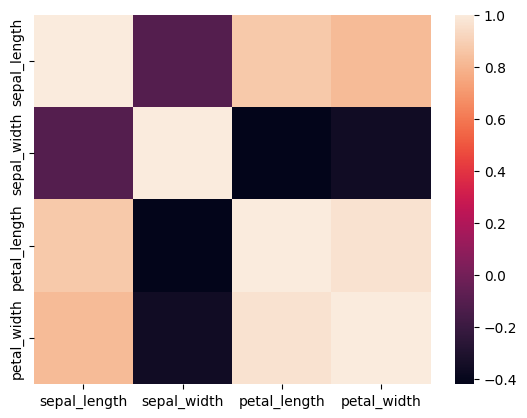

In [16]:
sns.heatmap(df.corr())

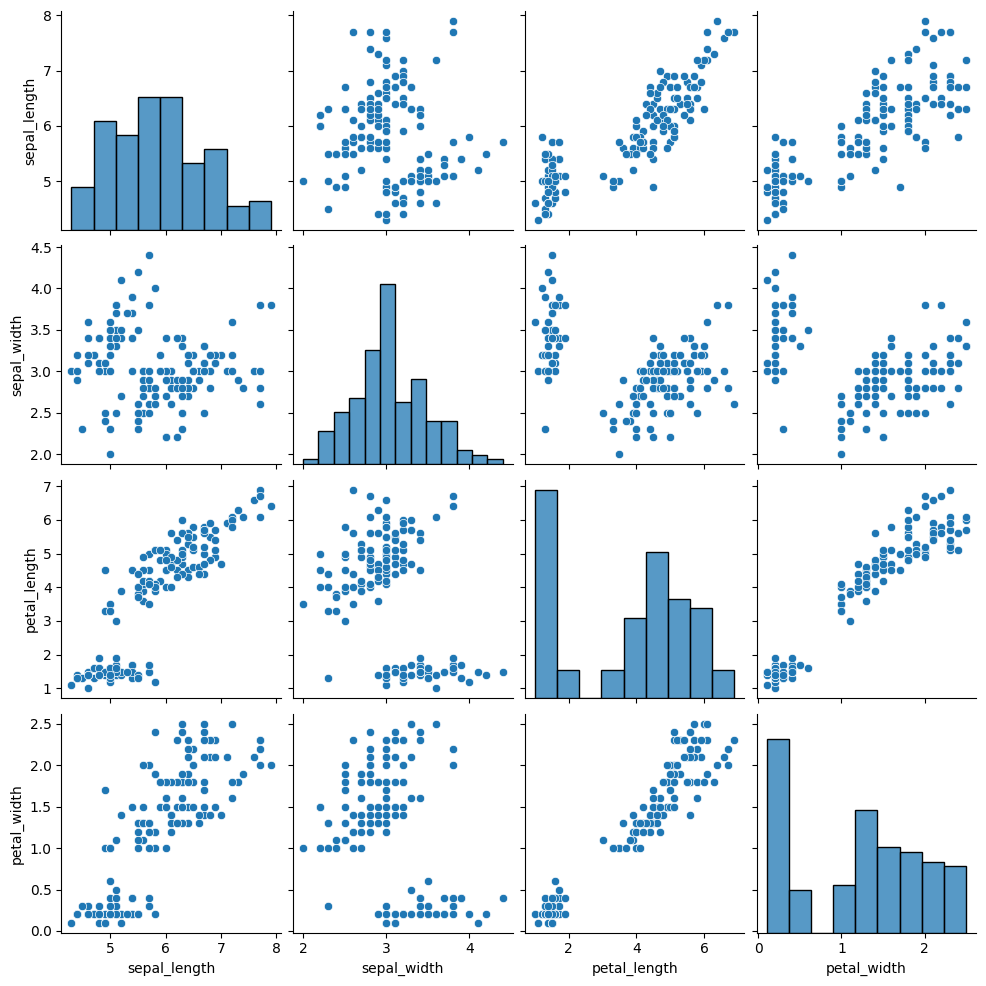

In [18]:
sns.pairplot(df)

## ENCODING

In [21]:
#ENCODING
le=LabelEncoder()
df["species"]=le.fit_transform(df["species"])

# SPLITTING THE DATASET

In [22]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [37]:
def report(x,y):
  print("Accuracy score : ",accuracy_score(x,y))
  print(confusion_matrix(x,y))
  print(classification_report(x,y))

# LOGISTIC REGRESSION

In [38]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [39]:
ypred_train_lr=lr.predict(x_train)
ypred_test_lr=lr.predict(x_test)

In [40]:
report(y_train,ypred_train_lr)
report(y_test,ypred_test_lr)

Accuracy score :  0.975
[[36  0  0]
 [ 0 40  2]
 [ 0  1 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.98      0.95      0.96        42
           2       0.95      0.98      0.96        42

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.97      0.97       120

Accuracy score :  0.9666666666666667
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



# DECISION TREE


In [41]:
dtc=DecisionTreeClassifier(max_depth=5,min_samples_split=5)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [42]:
ypred_train_dtc=dtc.predict(x_train)
ypred_test_dtc=dtc.predict(x_test)

In [43]:
report(y_train,ypred_train_dtc)
report(y_test,ypred_test_dtc)

Accuracy score :  0.9833333333333333
[[36  0  0]
 [ 0 40  2]
 [ 0  0 42]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      0.95      0.98        42
           2       0.95      1.00      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

Accuracy score :  0.9666666666666667
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



# RANDOM FOREST

In [44]:
rfc=RandomForestClassifier(n_estimators=100,min_samples_split=5)
rfc.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=5)

In [45]:
ypred_train_rfc=rfc.predict(x_train)
ypred_test_rfc=rfc.predict(x_test)

In [46]:
report(y_train,ypred_train_rfc)
report(y_test,ypred_test_rfc)


Accuracy score :  0.9833333333333333
[[36  0  0]
 [ 0 40  2]
 [ 0  0 42]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      0.95      0.98        42
           2       0.95      1.00      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

Accuracy score :  0.9666666666666667
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



# K-NEIGHBORS CLASSIFIER

In [53]:
knn=KNeighborsClassifier(n_neighbors=31)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=31)

In [54]:
ypred_train_knn=knn.predict(x_train)
ypred_test_knn=knn.predict(x_test)

In [55]:
report(y_train,ypred_train_knn)
report(y_test,ypred_test_knn)

Accuracy score :  0.9666666666666667
[[36  0  0]
 [ 0 41  1]
 [ 0  3 39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.93      0.98      0.95        42
           2       0.97      0.93      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

Accuracy score :  0.9666666666666667
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



#SUPPORT VECTOR MACHINE

In [56]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',C=1)
svc.fit(x_train,y_train)

SVC(C=1)

In [57]:
ypred_train_svc=svc.predict(x_train)
ypred_test_svc=svc.predict(x_test)

In [58]:
report(y_train,ypred_train_svc)
report(y_test,ypred_test_svc)


Accuracy score :  0.975
[[36  0  0]
 [ 0 41  1]
 [ 0  2 40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.98      0.96        42
           2       0.98      0.95      0.96        42

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.97      0.97       120

Accuracy score :  0.9666666666666667
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



# NAIVE BAYES

In [60]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [61]:
ypred_train_gnb=gnb.predict(x_train)
ypred_test_gnb=gnb.predict(x_test)

In [62]:
report(y_train,ypred_train_gnb)
report(y_test,ypred_test_gnb)

Accuracy score :  0.95
[[36  0  0]
 [ 0 40  2]
 [ 0  4 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.91      0.95      0.93        42
           2       0.95      0.90      0.93        42

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120

Accuracy score :  0.9666666666666667
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



# XGBOOST

In [63]:
import xgboost as xgb

In [64]:
xgb=xgb.XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [65]:
ypred_train_xgb=xgb.predict(x_train)
ypred_test_xgb=xgb.predict(x_test)

In [67]:
report(y_train,ypred_train_xgb)
report(y_test,ypred_test_xgb)

Accuracy score :  1.0
[[36  0  0]
 [ 0 42  0]
 [ 0  0 42]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        42

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Accuracy score :  0.9666666666666667
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

